**DRIVE MOUNT**

In [ ]:
from google.colab import drive
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import datetime
import pytz

london_timezone = pytz.timezone('Europe/London')
current_time_london = datetime.datetime.now(london_timezone)
print("Current Date and Time in London:", current_time_london.strftime("%Y-%m-%d %H:%M:%S %Z"))

Current Date and Time in London: 2023-12-07 12:23:15 GMT


LIBRARY IMPORTS

In [ ]:
from numpy.random import seed

# Ignore specific warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Importing Basic Libaries for Data Load and Image Movement
import os
import pandas as pd
import numpy as np
import itertools
import shutil

#Tensorflow libraries
import tensorflow
tensorflow.random.set_seed(101)

#libraries to build neural network models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,GlobalAveragePooling2D
from keras import backend as k

from keras.utils import to_categorical
from keras import optimizers
from keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.models import Model
from tensorflow.keras.utils import img_to_array,array_to_img
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger
from tensorflow.keras import regularizers

#Model Libraries:
from keras.applications import ResNet152V2
from tensorflow.keras.applications.resnet_v2  import preprocess_input

#Split and Importing evaluation libraries
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix, roc_curve, auc,classification_report,balanced_accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

#Plotting Graphs:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**DIRECTORIES CREATION**

In [ ]:
# Creating new directory for file movement:
skin_res_base_dir = 'skin_res_base_dir'
os.mkdir(skin_res_base_dir)

In [ ]:
# Generate a pathway leading to the 'skin_res_base_dir' to which we will append the names of the new folders
# Training Directory creation
train_dir = os.path.join(skin_res_base_dir, 'train_dir')
os.mkdir(train_dir)

# Validation Directory creation
val_dir = os.path.join(skin_res_base_dir, 'val_dir')
os.mkdir(val_dir)

# Test Directory creation
test_dir = os.path.join(skin_res_base_dir, 'test_dir')
os.mkdir(test_dir)

In [ ]:
# Creation of new folders inside Training Directory
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
os.mkdir(df)

In [ ]:
# Creation of new folders inside Validation Directory
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
os.mkdir(df)

In [ ]:
# Creation of new folders inside Test Directory
nv = os.path.join(test_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(test_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(test_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(test_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(test_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(test_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(test_dir, 'df')
os.mkdir(df)


**DATA LOAD AND ANALYSIS**

In [ ]:
#Read metadata information of HAM10000 dataset
df_data = pd.read_csv('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/HAM10000_metadata')

df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [ ]:
df_data.shape

(10015, 8)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB


In [ ]:
#HAM1000 attributes basic analysis
print('unique lesion_id records:' ,df_data.lesion_id.nunique())
print('unique image_id records:' ,df_data.image_id.nunique())
print('unique dx records:' ,df_data.dx.nunique())
print('unique dx_type records:' ,df_data.dx_type.nunique())
print('unique  age records:' ,df_data.age.nunique())
print('unique  sex records:' ,df_data.sex.nunique())
print('unique  localization records:' ,df_data.localization.nunique())
print('unique   dataset records:' ,df_data. dataset.nunique())

unique lesion_id records: 7470
unique image_id records: 10015
unique dx records: 7
unique dx_type records: 4
unique  age records: 18
unique  sex records: 3
unique  localization records: 15
unique   dataset records: 4


In [ ]:
#HAM10000 dataset value counts
column_list=['dx','dx_type','age','sex','localization','dataset']
for column in column_list:
    print(f"Value counts for '{column}':")
    print(df_data[column].value_counts())
    print("\n")

Value counts for 'dx':
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


Value counts for 'dx_type':
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64


Value counts for 'age':
45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: age, dtype: int64


Value counts for 'sex':
male       5406
female     4552
unknown      57
Name: sex, dtype: int64


Value counts for 'localization':
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  

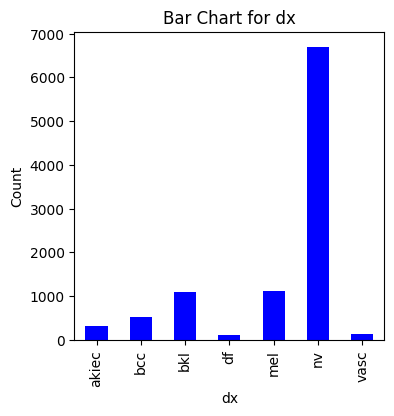

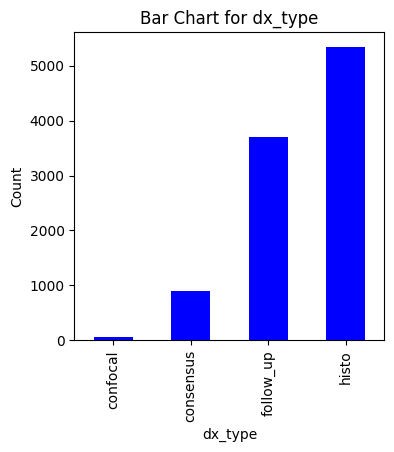

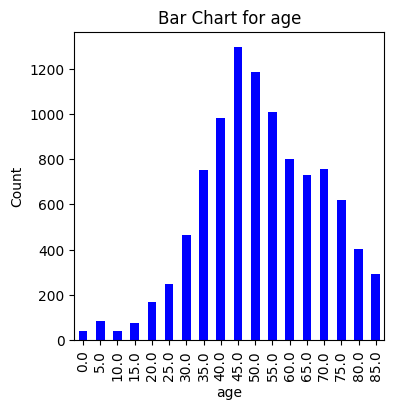

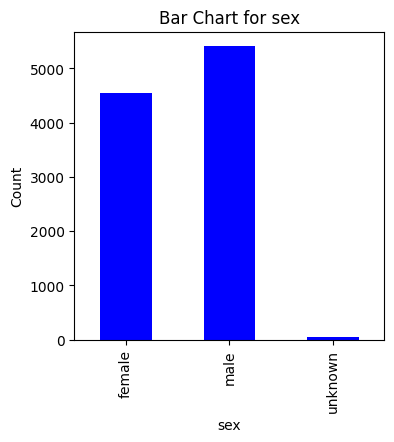

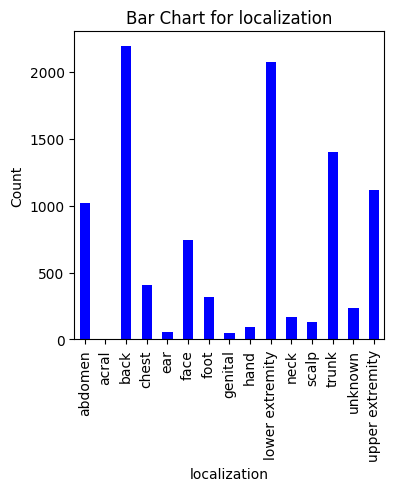

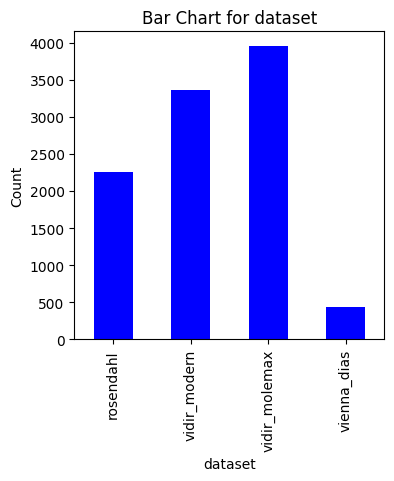

In [ ]:
# HAM10000 dataset visualization of variables
for column in column_list:
    plt.figure(figsize=(4, 4))
    df_data[column].value_counts().sort_index().plot(kind='bar', color='blue')
    plt.title(f'Bar Chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [ ]:
#Sorting the dataset based on Lesion_Id
df_data = df_data.sort_values(by='lesion_id')

In [ ]:
# Train , Test and Validation Split Ratio
train_ratio = 0.7  # 70% of the data for training
test_ratio = 0.15  # 15% of the data for testing
val_ratio = 0.15   # 15% of the data for validation

In [ ]:
# Split the DataFrame into train, test, and validation dataframes
df_train, test_val_df = train_test_split(df_data, test_size=(test_ratio + val_ratio), random_state=42)
df_test, df_val = train_test_split(test_val_df, test_size=(val_ratio / (test_ratio + val_ratio)), random_state=42)


In [ ]:
#Length of Data Frame
print('Length of df_train:',len(df_train))
print('Length of df_val:',len(df_val))
print('Length of df_test:',len(df_test))

Length of df_train: 7010
Length of df_val: 1503
Length of df_test: 1502


In [ ]:
#Training set unique class values
df_train['dx'].value_counts()

nv       4647
bkl       799
mel       790
bcc       362
akiec     228
vasc      100
df         84
Name: dx, dtype: int64

In [ ]:
#Validation set unique class values
df_val['dx'].value_counts()

nv       1015
mel       182
bkl       151
bcc        70
akiec      54
vasc       18
df         13
Name: dx, dtype: int64

In [ ]:
#Test set unique class values
df_test['dx'].value_counts()

nv       1043
bkl       149
mel       141
bcc        82
akiec      45
vasc       24
df         18
Name: dx, dtype: int64

**IMAGES COPY FROM SOURCE TO DESTINATION**

In [ ]:
# Get a list of images from HAM folder in Google Drive
folder = os.listdir('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES')

# Get a list of train ,test and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])
test_list = list(df_test['image_id'])

In [ ]:
#Moving the images from google dir to train_dir
for image in train_list:

    fname = image + '.jpg'
    #label = df_data.loc[image,'dx']
    label=df_data.loc[df_data['image_id'] == image, 'dx'].values[0]


    if fname in folder:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [ ]:
#Moving the images from google dir to val_dir
for image in val_list:

    fname = image + '.jpg'
    #label = df_data.loc[image,'dx']
    label=df_data.loc[df_data['image_id'] == image, 'dx'].values[0]

    if fname in folder:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [ ]:
#Moving the images from google dir to test_dir
for image in test_list:

    fname = image + '.jpg'
    #label = df_data.loc[image,'dx']
    label=df_data.loc[df_data['image_id'] == image, 'dx'].values[0]

    if fname in folder:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES', fname)
        # destination path to image
        dst = os.path.join(test_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [ ]:
# Determine the count of training images present in each directory.

print('nv:',len(os.listdir('skin_res_base_dir/train_dir/nv')))
print('mel:',len(os.listdir('skin_res_base_dir/train_dir/mel')))
print('bkl:',len(os.listdir('skin_res_base_dir/train_dir/bkl')))
print('bcc:',len(os.listdir('skin_res_base_dir/train_dir/bcc')))
print('akiec:',len(os.listdir('skin_res_base_dir/train_dir/akiec')))
print('vasc:',len(os.listdir('skin_res_base_dir/train_dir/vasc')))
print('df:',len(os.listdir('skin_res_base_dir/train_dir/df')))

nv: 4647
mel: 790
bkl: 799
bcc: 362
akiec: 228
vasc: 100
df: 84


In [ ]:
# Determine the count of val images present in each directory.

print('nv:',len(os.listdir('skin_res_base_dir/val_dir/nv')))
print('mel:',len(os.listdir('skin_res_base_dir/val_dir/mel')))
print('bkl:',len(os.listdir('skin_res_base_dir/val_dir/bkl')))
print('bcc:',len(os.listdir('skin_res_base_dir/val_dir/bcc')))
print('akiec:',len(os.listdir('skin_res_base_dir/val_dir/akiec')))
print('vasc:',len(os.listdir('skin_res_base_dir/val_dir/vasc')))
print('df:',len(os.listdir('skin_res_base_dir/val_dir/df')))

nv: 1015
mel: 182
bkl: 151
bcc: 70
akiec: 54
vasc: 18
df: 13


In [ ]:
# Check how many test images we have in each folder.

print('nv:',len(os.listdir('skin_res_base_dir/test_dir/nv')))
print('mel:',len(os.listdir('skin_res_base_dir/test_dir/mel')))
print('bkl:',len(os.listdir('skin_res_base_dir/test_dir/bkl')))
print('bcc:',len(os.listdir('skin_res_base_dir/test_dir/bcc')))
print('akiec:',len(os.listdir('skin_res_base_dir/test_dir/akiec')))
print('vasc:',len(os.listdir('skin_res_base_dir/test_dir/vasc')))
print('df:',len(os.listdir('skin_res_base_dir/test_dir/df')))

nv: 1043
mel: 141
bkl: 149
bcc: 82
akiec: 45
vasc: 24
df: 18


In [ ]:
#Copy the train images into skin_res_aug_dir
class_list = ['mel','bkl','bcc','akiec','vasc','df']

for item in class_list:

    # We are creating temporary directories
    # create a aug dir
    skin_res_aug_dir = 'skin_res_aug_dir'
    os.mkdir(skin_res_aug_dir)
    # create a dir within the base dir to store images of the same class
    img_dir = os.path.join(skin_res_aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # list all images in that directory
    img_list = os.listdir('skin_res_base_dir/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir e.g. class 'mel'
    for fname in img_list:
            # source path to image
            src = os.path.join('skin_res_base_dir/train_dir/' + img_class, fname)
            # destination path to image
            dst = os.path.join(img_dir, fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)


    # point to a dir containing the images and not to the images themselves
    path = skin_res_aug_dir
    save_path = 'skin_res_base_dir/train_dir/' + img_class

    # Create a data generator skin ui
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='jpg',
                                                    target_size=(224,224),
                                                    batch_size=batch_size)

    num_aug_images_wanted = 4500 # total number of images  in each class

    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    # run the generator and create augmented images
    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)

    # delete temporary directory with the raw image files
    shutil.rmtree('skin_res_aug_dir')

Found 790 images belonging to 1 classes.
Found 799 images belonging to 1 classes.
Found 362 images belonging to 1 classes.
Found 228 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Found 84 images belonging to 1 classes.


In [ ]:
# Determine the count of training images present in each directory.

print('nv:',len(os.listdir('skin_res_base_dir/train_dir/nv')))
print('mel:',len(os.listdir('skin_res_base_dir/train_dir/mel')))
print('bkl:',len(os.listdir('skin_res_base_dir/train_dir/bkl')))
print('bcc:',len(os.listdir('skin_res_base_dir/train_dir/bcc')))
print('akiec:',len(os.listdir('skin_res_base_dir/train_dir/akiec')))
print('vasc:',len(os.listdir('skin_res_base_dir/train_dir/vasc')))
print('df:',len(os.listdir('skin_res_base_dir/train_dir/df')))

nv: 4647
mel: 4500
bkl: 4545
bcc: 4132
akiec: 4154
vasc: 4500
df: 3830


In [ ]:
# Determine the count of val images present in each directory.

print('nv:',len(os.listdir('skin_res_base_dir/val_dir/nv')))
print('mel:',len(os.listdir('skin_res_base_dir/val_dir/mel')))
print('bkl:',len(os.listdir('skin_res_base_dir/val_dir/bkl')))
print('bcc:',len(os.listdir('skin_res_base_dir/val_dir/bcc')))
print('akiec:',len(os.listdir('skin_res_base_dir/val_dir/akiec')))
print('vasc:',len(os.listdir('skin_res_base_dir/val_dir/vasc')))
print('df:',len(os.listdir('skin_res_base_dir/val_dir/df')))

nv: 1015
mel: 182
bkl: 151
bcc: 70
akiec: 54
vasc: 18
df: 13


In [ ]:
# Check how many test images we have in each folder.

print('nv:',len(os.listdir('skin_res_base_dir/test_dir/nv')))
print('mel:',len(os.listdir('skin_res_base_dir/test_dir/mel')))
print('bkl:',len(os.listdir('skin_res_base_dir/test_dir/bkl')))
print('bcc:',len(os.listdir('skin_res_base_dir/test_dir/bcc')))
print('akiec:',len(os.listdir('skin_res_base_dir/test_dir/akiec')))
print('vasc:',len(os.listdir('skin_res_base_dir/test_dir/vasc')))
print('df:',len(os.listdir('skin_res_base_dir/test_dir/df')))

nv: 1043
mel: 141
bkl: 149
bcc: 82
akiec: 45
vasc: 24
df: 18


**IMAGE GENERATOR STEPS**

In [ ]:
#Prepare for Generator steps

train_path = 'skin_res_base_dir/train_dir'
valid_path = 'skin_res_base_dir/val_dir'
test_path='skin_res_base_dir/test_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
num_test_samples = len(df_test)
train_batch_size = 10
val_batch_size = 10
test_batch_size = 10

image_size = 224

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)
test_steps = np.ceil(num_test_samples / test_batch_size)

In [ ]:
#Data Generator Preprocessing and creating train,test and validation batches
datagen = ImageDataGenerator(
    preprocessing_function= \
    tensorflow.keras.applications.resnet_v2.preprocess_input)

train_batches = datagen.flow_from_directory(train_path,
                                            target_size=(image_size,image_size),
                                            batch_size=train_batch_size,class_mode='categorical')

valid_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=val_batch_size,class_mode='categorical')

test_batches = datagen.flow_from_directory(test_path,
                                            target_size=(image_size,image_size),
                                            batch_size=test_batch_size,
                                            shuffle=False,class_mode='categorical')

Found 30308 images belonging to 7 classes.
Found 1503 images belonging to 7 classes.
Found 1502 images belonging to 7 classes.


**MODEL BUILDING**

**#Iteration 1:**

In [ ]:
##############################################################################################################

In [ ]:
resnet_model = Sequential()
pretrained_model=ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(7, activation='softmax'))

234545216/234545216 [==============================] - 12s 0us/step


In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/1_best_model_RESNET152V2.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=resnet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 104s 124ms/step - loss: 1.3245 - accuracy: 0.5586 - val_loss: 0.9636 - val_accuracy: 0.7305
Epoch 2/30
701/701 [==============================] - 85s 121ms/step - loss: 0.8518 - accuracy: 0.6822 - val_loss: 0.7952 - val_accuracy: 0.7292
Epoch 3/30
701/701 [==============================] - 91s 129ms/step - loss: 0.6934 - accuracy: 0.7458 - val_loss: 0.9419 - val_accuracy: 0.7512
Epoch 4/30
701/701 [==============================] - 86s 122ms/step - loss: 0.5749 - accuracy: 0.7959 - val_loss: 0.7521 - val_accuracy: 0.7458
Epoch 5/30
701/701 [==============================] - 85s 122ms/step - loss: 0.5197 - accuracy: 0.8110 - val_loss: 0.8268 - val_accuracy: 0.7219
Epoch 6/30
701/701 [==============================] - 86s 122ms/step - loss: 0.4678 - accuracy: 0.8389 - val_loss: 0.7554 - val_accuracy: 0.7492
Epoch 6: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = resnet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 16s 92ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 12   7  10   5   4   5   2]
 [ 13  32  12   4   4  16   1]
 [  5   5  60   2  31  46   0]
 [  0   2   3   9   0   4   0]
 [  5   6  14   4  55  53   4]
 [  3  11  37   4  73 907   8]
 [  0   0   1   0   0   6  17]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.32      0.27      0.29        45
         bcc       0.51      0.39      0.44        82
         bkl       0.44      0.40      0.42       149
          df       0.32      0.50      0.39        18
         mel       0.33      0.39      0.36       141
          nv       0.87      0.87      0.87      1043
        vasc       0.53      0.71      0.61        24

    accuracy                           0.73      1502
   macro avg       0.47      0.50      0.48      1502
weighted avg       0.73      0.73      0.73      1502



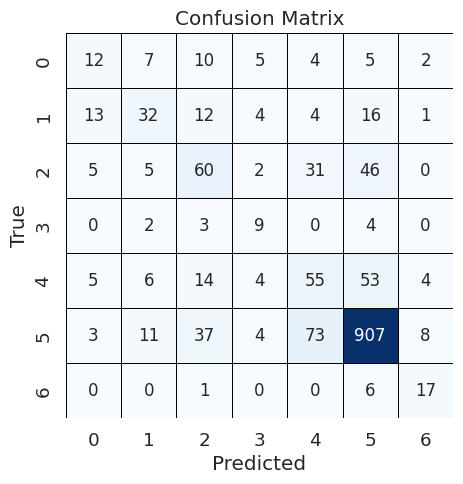

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

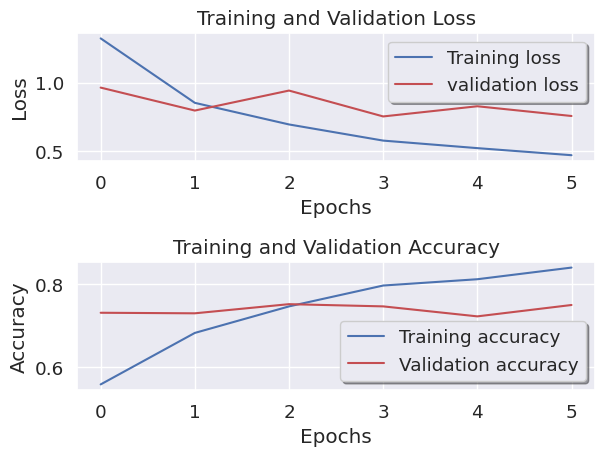

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
resnet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/1_best_model_RESNET152V2.h5')
results = resnet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = resnet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 14s 93ms/step - loss: 0.8725 - accuracy: 0.7483
 validation loss and accuracy are [0.8724523782730103, 0.7483355402946472]
0.8724523782730103 Test accuracy: 0.7483


In [ ]:
column_names = ['Train_Loss', 'Train_Accuracy', 'Val_Loss','Val_Accuracy','Test_Loss','Test_Accuracy']
df_model = pd.DataFrame(columns=column_names)

In [ ]:
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy


In [ ]:
history.history['accuracy'][-1]

0.8389443755149841

In [ ]:
    train_loss = history.history['loss'][-1]
    train_accuracy = history.history['accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    val_accuracy = history.history['val_accuracy'][-1]

In [ ]:
print(train_loss,train_accuracy,val_loss,val_accuracy,test_loss,test_accuracy)

0.4678303897380829 0.8389443755149841 0.7553509473800659 0.749168336391449 0.8724523782730103 0.7483355402946472


In [ ]:
# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)

In [ ]:
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.46783,0.838944,0.755351,0.749168,0.872452,0.748336


**#Iteration 2:**

In [ ]:
##############################################################################################################

In [ ]:
resnet_model = Sequential()
pretrained_model=ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(0.2))
resnet_model.add(Dense(7, activation='softmax'))

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/2_best_model_RESNET152V2.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=resnet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 101s 132ms/step - loss: 1.4649 - accuracy: 0.5248 - val_loss: 0.8694 - val_accuracy: 0.6880
Epoch 2/30
701/701 [==============================] - 94s 134ms/step - loss: 0.9685 - accuracy: 0.6524 - val_loss: 0.7153 - val_accuracy: 0.7365
Epoch 3/30
701/701 [==============================] - 86s 122ms/step - loss: 0.8151 - accuracy: 0.7023 - val_loss: 0.7885 - val_accuracy: 0.7132
Epoch 4/30
701/701 [==============================] - 93s 133ms/step - loss: 0.7314 - accuracy: 0.7340 - val_loss: 0.7408 - val_accuracy: 0.7458
Epoch 4: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = resnet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 16s 90ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 11   7  12   2   4   9   0]
 [  5  25  16   4   9  20   3]
 [  6   2  66   2  27  45   1]
 [  1   1   1   6   0   9   0]
 [  8   4  11   5  52  61   0]
 [  4   5  27   2  53 950   2]
 [  0   0   1   0   1   9  13]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.31      0.24      0.27        45
         bcc       0.57      0.30      0.40        82
         bkl       0.49      0.44      0.47       149
          df       0.29      0.33      0.31        18
         mel       0.36      0.37      0.36       141
          nv       0.86      0.91      0.89      1043
        vasc       0.68      0.54      0.60        24

    accuracy                           0.75      1502
   macro avg       0.51      0.45      0.47      1502
weighted avg       0.74      0.75      0.74      1502



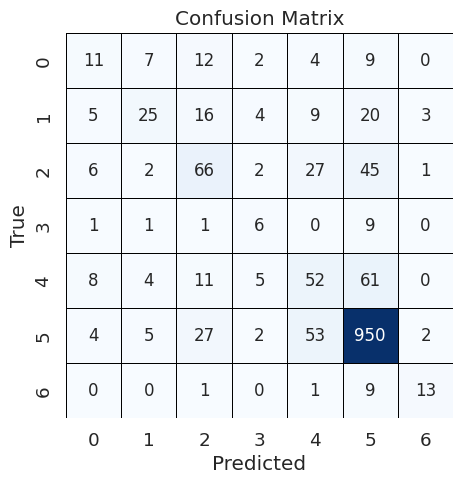

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

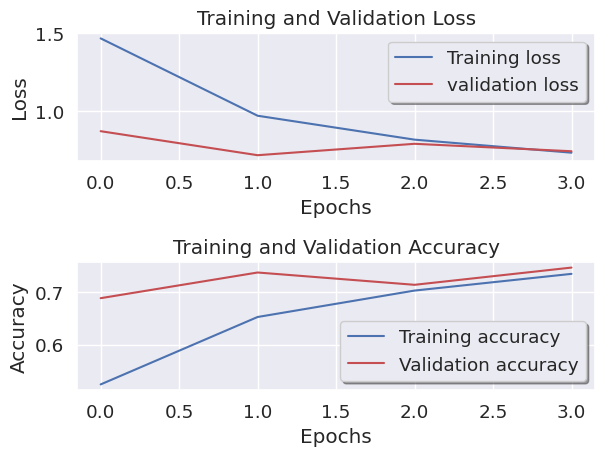

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
resnet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/2_best_model_RESNET152V2.h5')
results = resnet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = resnet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 14s 95ms/step - loss: 0.7602 - accuracy: 0.7364
 validation loss and accuracy are [0.760208010673523, 0.7363515496253967]
0.760208010673523 Test accuracy: 0.7364


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.731449,0.733952,0.740776,0.745842,0.760208,0.736352


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.467830,0.838944,0.755351,0.749168,0.872452,0.748336
1,0.731449,0.733952,0.740776,0.745842,0.760208,0.736352


**#Iteration 3:**

In [ ]:
##############################################################################################################

In [ ]:
resnet_model = Sequential()
pretrained_model=ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(7, activation='softmax'))

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/3_best_model_RESNET152V2.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=resnet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 100s 131ms/step - loss: 1.7325 - accuracy: 0.4650 - val_loss: 0.7889 - val_accuracy: 0.7199
Epoch 2/30
701/701 [==============================] - 85s 122ms/step - loss: 1.2015 - accuracy: 0.5515 - val_loss: 0.8117 - val_accuracy: 0.7059
Epoch 3/30
701/701 [==============================] - 93s 132ms/step - loss: 1.0896 - accuracy: 0.5954 - val_loss: 0.7283 - val_accuracy: 0.7339
Epoch 4/30
701/701 [==============================] - 85s 122ms/step - loss: 1.0021 - accuracy: 0.6248 - val_loss: 0.7637 - val_accuracy: 0.7152
Epoch 5/30
701/701 [==============================] - 86s 122ms/step - loss: 0.9406 - accuracy: 0.6484 - val_loss: 0.7132 - val_accuracy: 0.7325
Epoch 6/30
701/701 [==============================] - 94s 134ms/step - loss: 0.9005 - accuracy: 0.6593 - val_loss: 0.7138 - val_accuracy: 0.7392
Epoch 7/30
701/701 [==============================] - 86s 123ms/step - loss: 0.8860 - accuracy: 0.6729 - val_loss: 0.9132 - val_a

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = resnet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 16s 90ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  7   9  18   6   1   3   1]
 [  4  37  14   7   4  13   3]
 [  6   4  71   4  12  51   1]
 [  0   1   0  12   0   5   0]
 [  2   5  21   6  43  62   2]
 [  3  16  52  15  41 911   5]
 [  0   0   2   0   0   6  16]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.32      0.16      0.21        45
         bcc       0.51      0.45      0.48        82
         bkl       0.40      0.48      0.43       149
          df       0.24      0.67      0.35        18
         mel       0.43      0.30      0.36       141
          nv       0.87      0.87      0.87      1043
        vasc       0.57      0.67      0.62        24

    accuracy                           0.73      1502
   macro avg       0.48      0.51      0.47      1502
weighted avg       0.73      0.73      0.73      1502



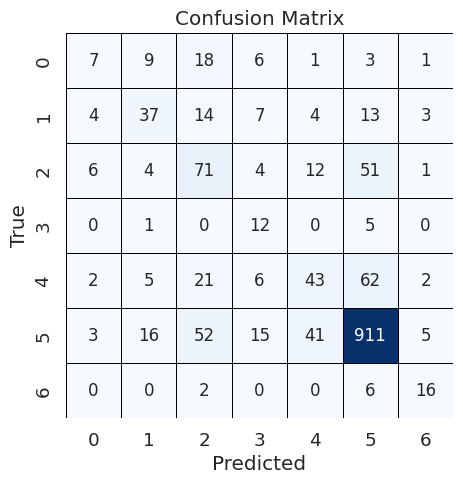

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

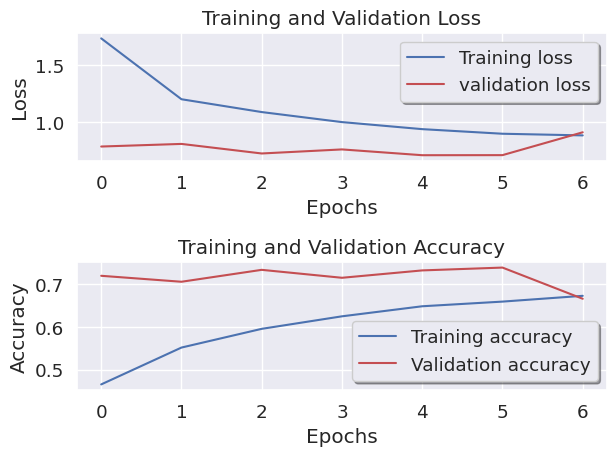

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
resnet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/3_best_model_RESNET152V2.h5')
results = resnet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = resnet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 14s 93ms/step - loss: 0.7361 - accuracy: 0.7457
 validation loss and accuracy are [0.7361006736755371, 0.7456724643707275]
0.7361006736755371 Test accuracy: 0.7457


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.886042,0.672896,0.913179,0.666001,0.736101,0.745672


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.467830,0.838944,0.755351,0.749168,0.872452,0.748336
1,0.731449,0.733952,0.740776,0.745842,0.760208,0.736352
2,0.886042,0.672896,0.913179,0.666001,0.736101,0.745672


**#Iteration 4:**

In [ ]:
##############################################################################################################

In [ ]:
resnet_model = Sequential()
pretrained_model=ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(GlobalAveragePooling2D())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(7, activation='softmax'))

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/4_best_model_RESNET152V2.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=resnet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 91s 118ms/step - loss: 1.2107 - accuracy: 0.5444 - val_loss: 0.8712 - val_accuracy: 0.6733
Epoch 2/30
701/701 [==============================] - 83s 118ms/step - loss: 0.9073 - accuracy: 0.6658 - val_loss: 0.7565 - val_accuracy: 0.7252
Epoch 3/30
701/701 [==============================] - 79s 113ms/step - loss: 0.7953 - accuracy: 0.7039 - val_loss: 0.7753 - val_accuracy: 0.6979
Epoch 4/30
701/701 [==============================] - 83s 118ms/step - loss: 0.7494 - accuracy: 0.7228 - val_loss: 0.7305 - val_accuracy: 0.7352
Epoch 5/30
701/701 [==============================] - 83s 118ms/step - loss: 0.6750 - accuracy: 0.7479 - val_loss: 0.7113 - val_accuracy: 0.7545
Epoch 6/30
701/701 [==============================] - 79s 113ms/step - loss: 0.6444 - accuracy: 0.7611 - val_loss: 0.7502 - val_accuracy: 0.7445
Epoch 7/30
701/701 [==============================] - 79s 113ms/step - loss: 0.5981 - accuracy: 0.7768 - val_loss: 0.7785 - val_ac

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = resnet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 16s 90ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  6   8  13   4  10   4   0]
 [  3  32  16   2   4  24   1]
 [  4   3  68   1  20  53   0]
 [  0   2   3   6   0   7   0]
 [  1   7  21   1  50  61   0]
 [  2   7  41   1  42 950   0]
 [  0   0   1   0   0  13  10]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.38      0.13      0.20        45
         bcc       0.54      0.39      0.45        82
         bkl       0.42      0.46      0.44       149
          df       0.40      0.33      0.36        18
         mel       0.40      0.35      0.37       141
          nv       0.85      0.91      0.88      1043
        vasc       0.91      0.42      0.57        24

    accuracy                           0.75      1502
   macro avg       0.56      0.43      0.47      1502
weighted avg       0.73      0.75      0.73      1502



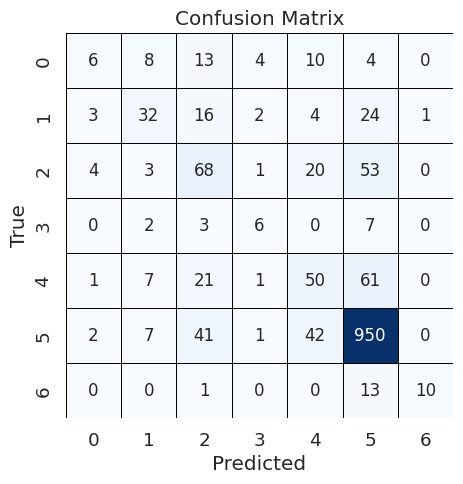

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

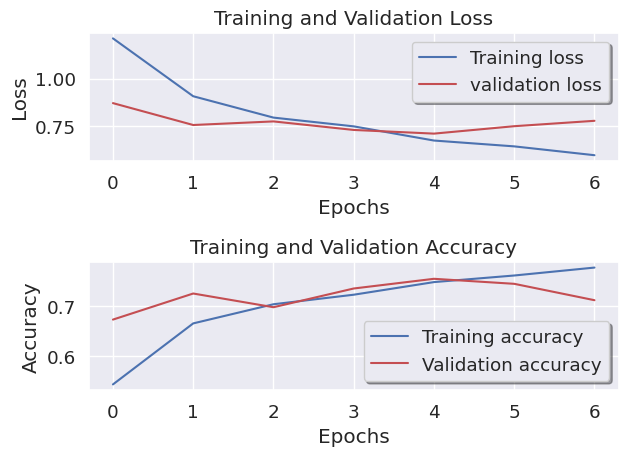

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
resnet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/4_best_model_RESNET152V2.h5')
results = resnet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = resnet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 14s 91ms/step - loss: 0.7075 - accuracy: 0.7470
 validation loss and accuracy are [0.7074886560440063, 0.747003972530365]
0.7074886560440063 Test accuracy: 0.7470


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.598114,0.776827,0.778477,0.71191,0.707489,0.747004


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.467830,0.838944,0.755351,0.749168,0.872452,0.748336
1,0.731449,0.733952,0.740776,0.745842,0.760208,0.736352
2,0.886042,0.672896,0.913179,0.666001,0.736101,0.745672
3,0.598114,0.776827,0.778477,0.711910,0.707489,0.747004


**#Iteration 5:**

In [ ]:
##############################################################################################################

In [ ]:
resnet_model = Sequential()
pretrained_model=ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=True

resnet_model.add(pretrained_model)
resnet_model.add(GlobalAveragePooling2D())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(7, activation='softmax'))

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/5_best_model_RESNET152V2.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=resnet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 303s 326ms/step - loss: 1.0182 - accuracy: 0.6178 - val_loss: 0.7677 - val_accuracy: 0.7578
Epoch 2/30
701/701 [==============================] - 223s 318ms/step - loss: 0.7155 - accuracy: 0.7375 - val_loss: 0.7606 - val_accuracy: 0.7392
Epoch 3/30
701/701 [==============================] - 234s 334ms/step - loss: 0.5898 - accuracy: 0.7880 - val_loss: 0.6626 - val_accuracy: 0.7591
Epoch 4/30
701/701 [==============================] - 233s 332ms/step - loss: 0.5192 - accuracy: 0.8093 - val_loss: 0.5552 - val_accuracy: 0.7917
Epoch 5/30
701/701 [==============================] - 223s 317ms/step - loss: 0.4645 - accuracy: 0.8302 - val_loss: 0.6224 - val_accuracy: 0.7598
Epoch 6/30
701/701 [==============================] - 232s 331ms/step - loss: 0.4304 - accuracy: 0.8435 - val_loss: 0.5468 - val_accuracy: 0.7984
Epoch 7/30
701/701 [==============================] - 222s 317ms/step - loss: 0.3704 - accuracy: 0.8665 - val_loss: 0.6670 -

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = resnet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 16s 90ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 24   8   5   1   1   6   0]
 [  3  57   6   3   2  11   0]
 [  7   1  93   0   8  39   1]
 [  0   1   2  12   0   3   0]
 [  3   8  14   1  44  71   0]
 [  5   9  32   0  22 975   0]
 [  0   0   0   0   0   5  19]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.57      0.53      0.55        45
         bcc       0.68      0.70      0.69        82
         bkl       0.61      0.62      0.62       149
          df       0.71      0.67      0.69        18
         mel       0.57      0.31      0.40       141
          nv       0.88      0.93      0.91      1043
        vasc       0.95      0.79      0.86        24

    accuracy                           0.81      1502
   macro avg       0.71      0.65      0.67      1502
weighted avg       0.80      0.81      0.80      1502



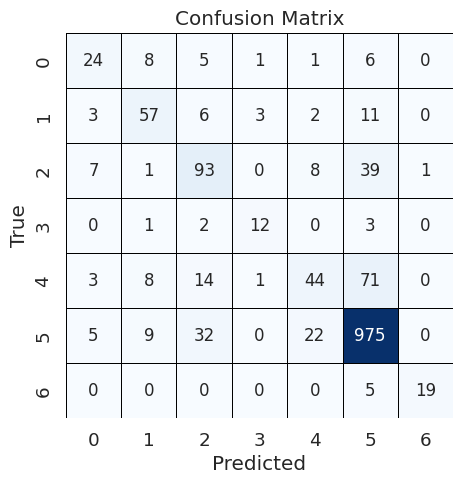

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

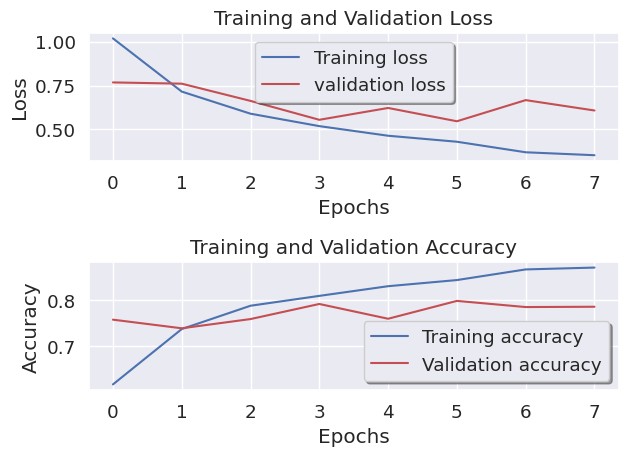

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
resnet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/5_best_model_RESNET152V2.h5')
results = resnet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = resnet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 14s 93ms/step - loss: 0.5242 - accuracy: 0.8149
 validation loss and accuracy are [0.5241876244544983, 0.8149134516716003]
0.5241876244544983 Test accuracy: 0.8149


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.353761,0.870471,0.608069,0.785762,0.524188,0.814913


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.467830,0.838944,0.755351,0.749168,0.872452,0.748336
1,0.731449,0.733952,0.740776,0.745842,0.760208,0.736352
2,0.886042,0.672896,0.913179,0.666001,0.736101,0.745672
3,0.598114,0.776827,0.778477,0.711910,0.707489,0.747004
4,0.353761,0.870471,0.608069,0.785762,0.524188,0.814913


**#Iteration 6:**

In [ ]:
##############################################################################################################

In [ ]:
resnet_model = Sequential()
pretrained_model=ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(GlobalAveragePooling2D())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = SGD(lr=0.00001, momentum=0.9, nesterov=True)

resnet_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/6_best_model_RESNET152V2.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=resnet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 91s 119ms/step - loss: 1.2952 - accuracy: 0.5158 - val_loss: 1.0010 - val_accuracy: 0.6194
Epoch 2/30
701/701 [==============================] - 83s 118ms/step - loss: 1.1700 - accuracy: 0.5669 - val_loss: 0.9519 - val_accuracy: 0.6500
Epoch 3/30
701/701 [==============================] - 79s 113ms/step - loss: 1.1097 - accuracy: 0.5909 - val_loss: 1.0709 - val_accuracy: 0.5729
Epoch 4/30
701/701 [==============================] - 80s 113ms/step - loss: 1.0468 - accuracy: 0.6175 - val_loss: 1.3096 - val_accuracy: 0.5522
Epoch 4: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = resnet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 16s 89ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  8   5  21   0   6   3   2]
 [  6   4  24   3  19  19   7]
 [  0   0  76   0  39  33   1]
 [  0   0   4   4   5   4   1]
 [  1   0  36   3  56  44   1]
 [  2   7  44   2 171 798  19]
 [  0   0   1   0   1   4  18]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.47      0.18      0.26        45
         bcc       0.25      0.05      0.08        82
         bkl       0.37      0.51      0.43       149
          df       0.33      0.22      0.27        18
         mel       0.19      0.40      0.26       141
          nv       0.88      0.77      0.82      1043
        vasc       0.37      0.75      0.49        24

    accuracy                           0.64      1502
   macro avg       0.41      0.41      0.37      1502
weighted avg       0.70      0.64      0.66      1502



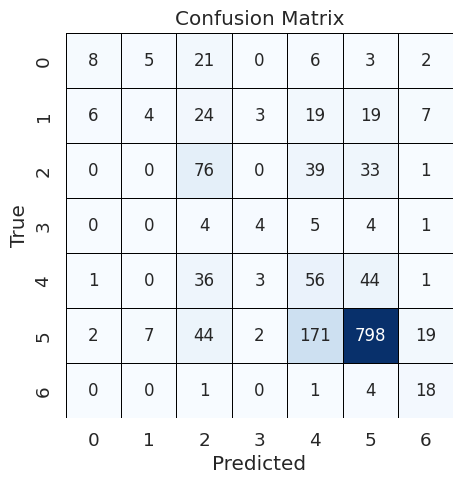

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

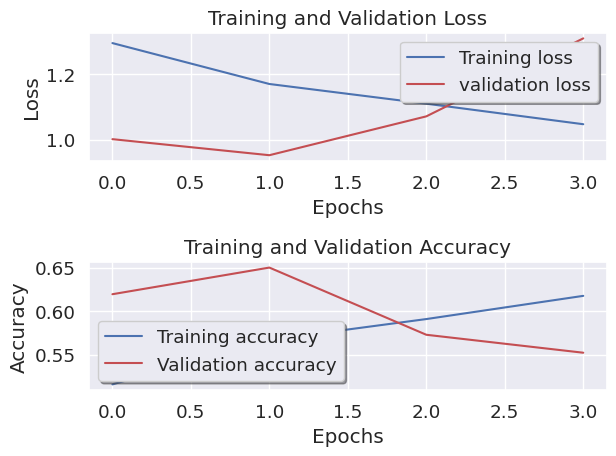

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
resnet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/6_best_model_RESNET152V2.h5')
results = resnet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = resnet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 14s 92ms/step - loss: 0.9377 - accuracy: 0.6418
 validation loss and accuracy are [0.9377174973487854, 0.6418108940124512]
0.9377174973487854 Test accuracy: 0.6418


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,1.046808,0.617546,1.30963,0.552229,0.937717,0.641811


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.467830,0.838944,0.755351,0.749168,0.872452,0.748336
1,0.731449,0.733952,0.740776,0.745842,0.760208,0.736352
2,0.886042,0.672896,0.913179,0.666001,0.736101,0.745672
3,0.598114,0.776827,0.778477,0.711910,0.707489,0.747004
4,0.353761,0.870471,0.608069,0.785762,0.524188,0.814913
5,1.046808,0.617546,1.309630,0.552229,0.937717,0.641811


**#Iteration 7:**

In [ ]:
##############################################################################################################

In [ ]:
resnet_model = Sequential()
pretrained_model=ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(GlobalAveragePooling2D())
resnet_model.add(Dense(512, activation='relu', input_dim=(224,224,3)))
resnet_model.add(Dropout(0.3))
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(0.3))
resnet_model.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = SGD(lr=0.00001, momentum=0.9, nesterov=True)

resnet_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/7_best_model_RESNET152V2.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=resnet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 93s 119ms/step - loss: 1.5369 - accuracy: 0.4243 - val_loss: 1.2901 - val_accuracy: 0.5183
Epoch 2/30
701/701 [==============================] - 83s 118ms/step - loss: 1.3643 - accuracy: 0.4809 - val_loss: 0.9411 - val_accuracy: 0.6440
Epoch 3/30
701/701 [==============================] - 80s 113ms/step - loss: 1.3095 - accuracy: 0.5131 - val_loss: 1.1794 - val_accuracy: 0.6121
Epoch 4/30
701/701 [==============================] - 86s 122ms/step - loss: 1.2707 - accuracy: 0.5291 - val_loss: 0.9503 - val_accuracy: 0.6973
Epoch 4: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = resnet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 16s 90ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  4   2  16   3  12   7   1]
 [  0  14  10  15  20  22   1]
 [  2   2  47  11  38  47   2]
 [  1   0   3   6   0   8   0]
 [  0   0  14  11  54  59   3]
 [  1   5  41  28 112 845  11]
 [  0   0   1   2   1   9  11]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.50      0.09      0.15        45
         bcc       0.61      0.17      0.27        82
         bkl       0.36      0.32      0.33       149
          df       0.08      0.33      0.13        18
         mel       0.23      0.38      0.29       141
          nv       0.85      0.81      0.83      1043
        vasc       0.38      0.46      0.42        24

    accuracy                           0.65      1502
   macro avg       0.43      0.37      0.34      1502
weighted avg       0.70      0.65      0.66      1502



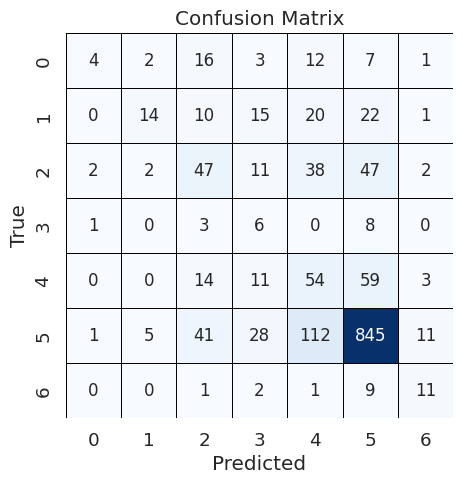

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

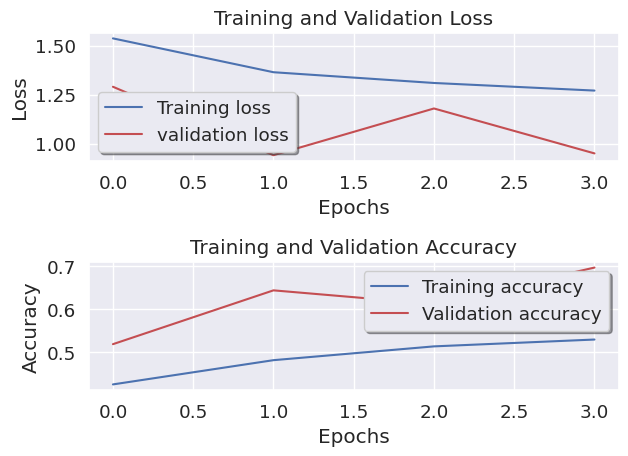

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
resnet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/7_best_model_RESNET152V2.h5')
results = resnet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = resnet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 14s 93ms/step - loss: 0.9281 - accuracy: 0.7044
 validation loss and accuracy are [0.9280699491500854, 0.7043941617012024]
0.9280699491500854 Test accuracy: 0.7044


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,1.270661,0.52911,0.950318,0.697272,0.92807,0.704394


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.467830,0.838944,0.755351,0.749168,0.872452,0.748336
1,0.731449,0.733952,0.740776,0.745842,0.760208,0.736352
2,0.886042,0.672896,0.913179,0.666001,0.736101,0.745672
3,0.598114,0.776827,0.778477,0.711910,0.707489,0.747004
4,0.353761,0.870471,0.608069,0.785762,0.524188,0.814913
5,1.046808,0.617546,1.309630,0.552229,0.937717,0.641811
6,1.270661,0.529110,0.950318,0.697272,0.928070,0.704394


**#Iteration 8:**

In [ ]:
##############################################################################################################

In [ ]:
resnet_model = Sequential()
pretrained_model=ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(224, activation='relu'))
resnet_model.add(Dense(7, activation='softmax'))

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/8_best_model_RESNET152V2.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=resnet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 94s 122ms/step - loss: 1.2681 - accuracy: 0.5529 - val_loss: 0.9104 - val_accuracy: 0.6667
Epoch 2/30
701/701 [==============================] - 88s 126ms/step - loss: 0.8602 - accuracy: 0.6859 - val_loss: 0.8320 - val_accuracy: 0.7112
Epoch 3/30
701/701 [==============================] - 81s 116ms/step - loss: 0.7429 - accuracy: 0.7325 - val_loss: 0.8190 - val_accuracy: 0.7026
Epoch 4/30
701/701 [==============================] - 87s 124ms/step - loss: 0.6051 - accuracy: 0.7800 - val_loss: 0.7414 - val_accuracy: 0.7379
Epoch 5/30
701/701 [==============================] - 89s 127ms/step - loss: 0.5211 - accuracy: 0.8094 - val_loss: 0.7432 - val_accuracy: 0.7558
Epoch 6/30
701/701 [==============================] - 89s 127ms/step - loss: 0.4471 - accuracy: 0.8435 - val_loss: 0.7611 - val_accuracy: 0.7585
Epoch 6: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = resnet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 16s 89ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 18   4  11   1   8   2   1]
 [ 10  36   9   3   9  14   1]
 [  3   4  78   0  34  29   1]
 [  1   1   2   6   1   7   0]
 [  2   5  20   1  66  45   2]
 [  3  15  36   2  79 902   6]
 [  0   0   1   1   0  10  12]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.49      0.40      0.44        45
         bcc       0.55      0.44      0.49        82
         bkl       0.50      0.52      0.51       149
          df       0.43      0.33      0.38        18
         mel       0.34      0.47      0.39       141
          nv       0.89      0.86      0.88      1043
        vasc       0.52      0.50      0.51        24

    accuracy                           0.74      1502
   macro avg       0.53      0.50      0.51      1502
weighted avg       0.76      0.74      0.75      1502



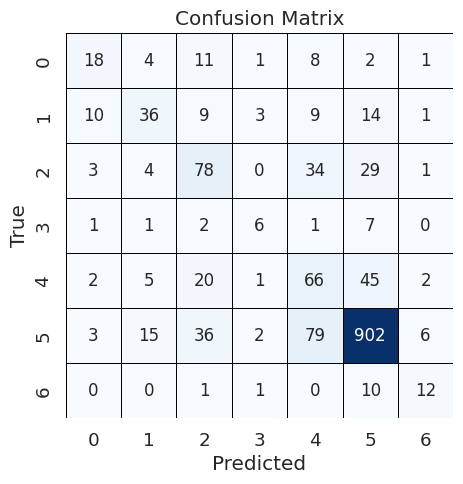

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

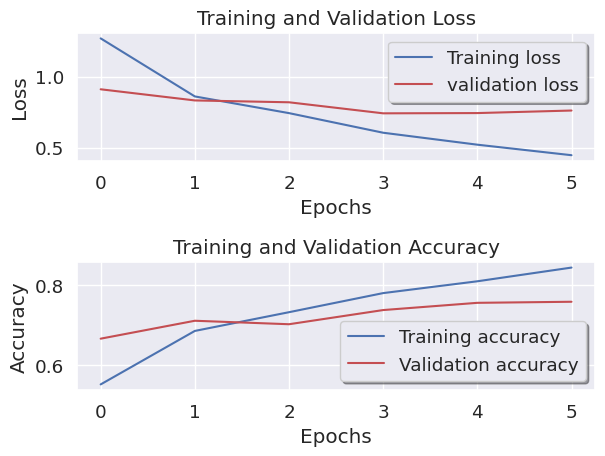

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
resnet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/8_best_model_RESNET152V2.h5')
results = resnet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = resnet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 14s 94ms/step - loss: 0.7868 - accuracy: 0.7530
 validation loss and accuracy are [0.7868427038192749, 0.752996027469635]
0.7868427038192749 Test accuracy: 0.7530


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.44712,0.843509,0.761075,0.758483,0.786843,0.752996


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.467830,0.838944,0.755351,0.749168,0.872452,0.748336
1,0.731449,0.733952,0.740776,0.745842,0.760208,0.736352
2,0.886042,0.672896,0.913179,0.666001,0.736101,0.745672
3,0.598114,0.776827,0.778477,0.711910,0.707489,0.747004
4,0.353761,0.870471,0.608069,0.785762,0.524188,0.814913
5,1.046808,0.617546,1.309630,0.552229,0.937717,0.641811
6,1.270661,0.529110,0.950318,0.697272,0.928070,0.704394
7,0.447120,0.843509,0.761075,0.758483,0.786843,0.752996


**#Iteration 9:**

In [ ]:
##############################################################################################################

In [ ]:
resnet_model = Sequential()
pretrained_model=ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(224, activation='relu'))
resnet_model.add(Dropout(0.2))
resnet_model.add(Dense(7, activation='softmax'))

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/9_best_model_RESNET152V2.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=resnet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 94s 122ms/step - loss: 1.3803 - accuracy: 0.5197 - val_loss: 0.8736 - val_accuracy: 0.7073
Epoch 2/30
701/701 [==============================] - 87s 124ms/step - loss: 0.9974 - accuracy: 0.6274 - val_loss: 0.7980 - val_accuracy: 0.7339
Epoch 3/30
701/701 [==============================] - 87s 124ms/step - loss: 0.8847 - accuracy: 0.6800 - val_loss: 0.7725 - val_accuracy: 0.7472
Epoch 4/30
701/701 [==============================] - 81s 115ms/step - loss: 0.7872 - accuracy: 0.7067 - val_loss: 0.7736 - val_accuracy: 0.7445
Epoch 5/30
701/701 [==============================] - 81s 116ms/step - loss: 0.6919 - accuracy: 0.7439 - val_loss: 0.7770 - val_accuracy: 0.7385
Epoch 5: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = resnet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 16s 89ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  9   8   8   7   3  10   0]
 [  6  30  10   3   4  27   2]
 [  4   1  48   4  27  65   0]
 [  0   1   0  11   0   6   0]
 [  5   3  12   6  45  68   2]
 [ 11  10  27   5  54 935   1]
 [  0   0   1   0   2   6  15]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.26      0.20      0.23        45
         bcc       0.57      0.37      0.44        82
         bkl       0.45      0.32      0.38       149
          df       0.31      0.61      0.41        18
         mel       0.33      0.32      0.33       141
          nv       0.84      0.90      0.87      1043
        vasc       0.75      0.62      0.68        24

    accuracy                           0.73      1502
   macro avg       0.50      0.48      0.48      1502
weighted avg       0.71      0.73      0.72      1502



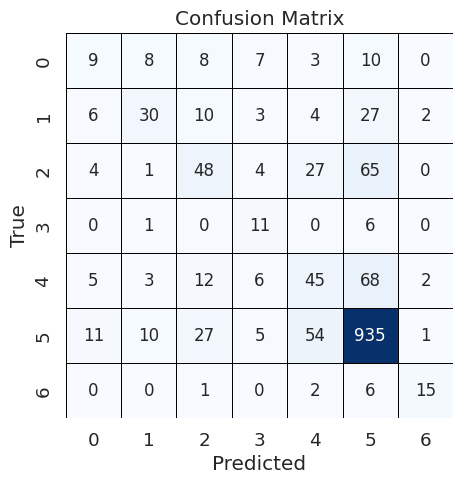

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

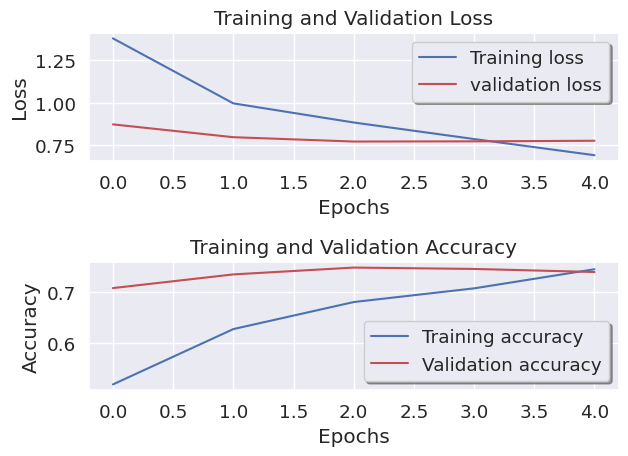

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
resnet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/9_best_model_RESNET152V2.h5')
results = resnet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = resnet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 14s 93ms/step - loss: 0.7833 - accuracy: 0.7277
 validation loss and accuracy are [0.7833330631256104, 0.727696418762207]
0.7833330631256104 Test accuracy: 0.7277


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.691937,0.743937,0.777028,0.738523,0.783333,0.727696


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.467830,0.838944,0.755351,0.749168,0.872452,0.748336
1,0.731449,0.733952,0.740776,0.745842,0.760208,0.736352
2,0.886042,0.672896,0.913179,0.666001,0.736101,0.745672
3,0.598114,0.776827,0.778477,0.711910,0.707489,0.747004
4,0.353761,0.870471,0.608069,0.785762,0.524188,0.814913
5,1.046808,0.617546,1.309630,0.552229,0.937717,0.641811
6,1.270661,0.529110,0.950318,0.697272,0.928070,0.704394
7,0.447120,0.843509,0.761075,0.758483,0.786843,0.752996
8,0.691937,0.743937,0.777028,0.738523,0.783333,0.727696


**#Iteration 10:**

In [ ]:
##############################################################################################################

In [ ]:
resnet_model = Sequential()
pretrained_model=ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(224, activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(7, activation='softmax'))

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/10_best_model_RESNET152V2.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=resnet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 96s 123ms/step - loss: 1.6176 - accuracy: 0.4344 - val_loss: 0.8670 - val_accuracy: 0.7092
Epoch 2/30
701/701 [==============================] - 82s 116ms/step - loss: 1.2887 - accuracy: 0.5190 - val_loss: 0.8269 - val_accuracy: 0.7092
Epoch 3/30
701/701 [==============================] - 88s 125ms/step - loss: 1.2158 - accuracy: 0.5398 - val_loss: 0.7938 - val_accuracy: 0.7126
Epoch 4/30
701/701 [==============================] - 87s 124ms/step - loss: 1.1557 - accuracy: 0.5693 - val_loss: 0.7974 - val_accuracy: 0.7166
Epoch 5/30
701/701 [==============================] - 82s 117ms/step - loss: 1.0876 - accuracy: 0.5944 - val_loss: 0.8041 - val_accuracy: 0.7066
Epoch 5: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = resnet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 16s 90ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  9   3  11   5   6  10   1]
 [  9  20   6   9   7  29   2]
 [  7   0  32   5  25  79   1]
 [  2   0   1   7   0   8   0]
 [  2   3  10   5  45  73   3]
 [  3   5  27   2  36 964   6]
 [  0   0   2   1   0   9  12]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.28      0.20      0.23        45
         bcc       0.65      0.24      0.35        82
         bkl       0.36      0.21      0.27       149
          df       0.21      0.39      0.27        18
         mel       0.38      0.32      0.35       141
          nv       0.82      0.92      0.87      1043
        vasc       0.48      0.50      0.49        24

    accuracy                           0.73      1502
   macro avg       0.45      0.40      0.40      1502
weighted avg       0.70      0.73      0.70      1502



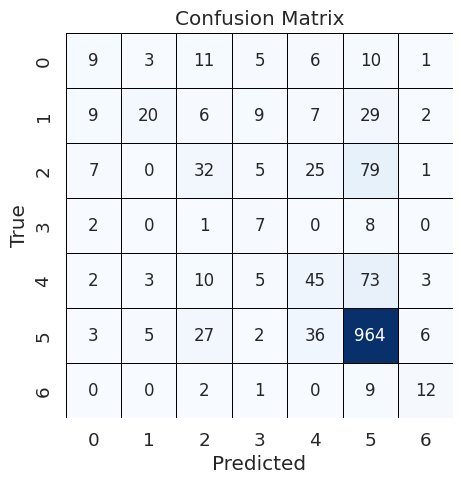

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

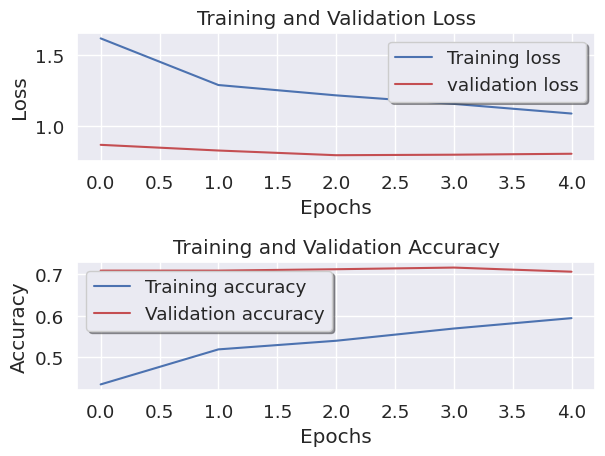

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
resnet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/10_best_model_RESNET152V2.h5')
results = resnet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = resnet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 14s 93ms/step - loss: 0.8501 - accuracy: 0.7177
 validation loss and accuracy are [0.8500970005989075, 0.7177097201347351]
0.8500970005989075 Test accuracy: 0.7177


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,1.08762,0.594437,0.804057,0.706587,0.850097,0.71771


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.467830,0.838944,0.755351,0.749168,0.872452,0.748336
1,0.731449,0.733952,0.740776,0.745842,0.760208,0.736352
2,0.886042,0.672896,0.913179,0.666001,0.736101,0.745672
3,0.598114,0.776827,0.778477,0.711910,0.707489,0.747004
4,0.353761,0.870471,0.608069,0.785762,0.524188,0.814913
5,1.046808,0.617546,1.309630,0.552229,0.937717,0.641811
6,1.270661,0.529110,0.950318,0.697272,0.928070,0.704394
7,0.447120,0.843509,0.761075,0.758483,0.786843,0.752996
8,0.691937,0.743937,0.777028,0.738523,0.783333,0.727696
9,1.087620,0.594437,0.804057,0.706587,0.850097,0.717710


**#Iteration 11:**

In [ ]:
##############################################################################################################

In [ ]:
resnet_model = Sequential()
pretrained_model=ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(GlobalAveragePooling2D())
resnet_model.add(Dense(224, activation='relu'))
resnet_model.add(Dense(7, activation='softmax'))

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/11_best_model_RESNET152V2.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=resnet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 91s 118ms/step - loss: 1.2464 - accuracy: 0.5304 - val_loss: 0.7972 - val_accuracy: 0.7219
Epoch 2/30
701/701 [==============================] - 82s 117ms/step - loss: 0.9509 - accuracy: 0.6536 - val_loss: 0.7501 - val_accuracy: 0.7319
Epoch 3/30
701/701 [==============================] - 82s 117ms/step - loss: 0.8552 - accuracy: 0.6856 - val_loss: 0.7221 - val_accuracy: 0.7385
Epoch 4/30
701/701 [==============================] - 82s 117ms/step - loss: 0.7861 - accuracy: 0.7078 - val_loss: 0.7150 - val_accuracy: 0.7465
Epoch 5/30
701/701 [==============================] - 79s 113ms/step - loss: 0.7457 - accuracy: 0.7244 - val_loss: 0.7396 - val_accuracy: 0.7372
Epoch 6/30
701/701 [==============================] - 82s 117ms/step - loss: 0.6845 - accuracy: 0.7462 - val_loss: 0.6971 - val_accuracy: 0.7525
Epoch 7/30
701/701 [==============================] - 79s 113ms/step - loss: 0.6845 - accuracy: 0.7499 - val_loss: 0.7142 - val_ac

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = resnet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 16s 89ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 10   8  15   0   4   7   1]
 [  4  32  17   2   2  23   2]
 [  4   4  74   0  12  54   1]
 [  1   2   3   5   0   7   0]
 [  1   7  24   0  49  60   0]
 [  3  10  43   0  53 929   5]
 [  0   0   1   0   1   8  14]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.43      0.22      0.29        45
         bcc       0.51      0.39      0.44        82
         bkl       0.42      0.50      0.45       149
          df       0.71      0.28      0.40        18
         mel       0.40      0.35      0.37       141
          nv       0.85      0.89      0.87      1043
        vasc       0.61      0.58      0.60        24

    accuracy                           0.74      1502
   macro avg       0.56      0.46      0.49      1502
weighted avg       0.73      0.74      0.73      1502



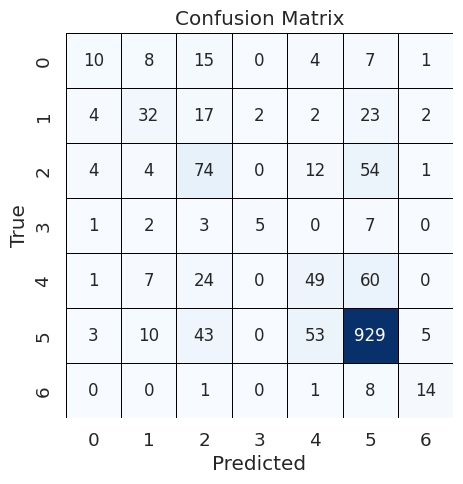

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

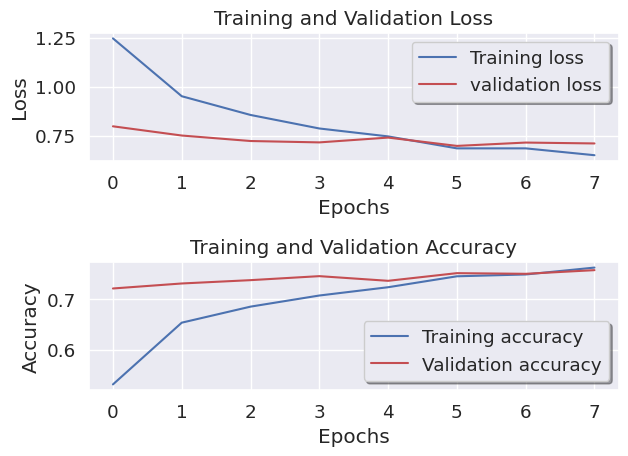

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
resnet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/11_best_model_RESNET152V2.h5')
results = resnet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = resnet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 14s 93ms/step - loss: 0.7078 - accuracy: 0.7397
 validation loss and accuracy are [0.7077904939651489, 0.7396804094314575]
0.7077904939651489 Test accuracy: 0.7397


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.649557,0.763623,0.70963,0.758483,0.70779,0.73968


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.467830,0.838944,0.755351,0.749168,0.872452,0.748336
1,0.731449,0.733952,0.740776,0.745842,0.760208,0.736352
2,0.886042,0.672896,0.913179,0.666001,0.736101,0.745672
3,0.598114,0.776827,0.778477,0.711910,0.707489,0.747004
4,0.353761,0.870471,0.608069,0.785762,0.524188,0.814913
5,1.046808,0.617546,1.309630,0.552229,0.937717,0.641811
6,1.270661,0.529110,0.950318,0.697272,0.928070,0.704394
7,0.447120,0.843509,0.761075,0.758483,0.786843,0.752996
8,0.691937,0.743937,0.777028,0.738523,0.783333,0.727696
9,1.087620,0.594437,0.804057,0.706587,0.850097,0.717710


**#Iteration 12:**

In [ ]:
##############################################################################################################

In [ ]:
resnet_model = Sequential()
pretrained_model=ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=True

resnet_model.add(pretrained_model)
resnet_model.add(GlobalAveragePooling2D())
resnet_model.add(Dense(224, activation='relu'))
resnet_model.add(Dense(7, activation='softmax'))

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/12_best_model_RESNET152V2.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=resnet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 299s 329ms/step - loss: 0.9659 - accuracy: 0.6367 - val_loss: 1.0007 - val_accuracy: 0.6919
Epoch 2/30
701/701 [==============================] - 232s 331ms/step - loss: 0.7024 - accuracy: 0.7421 - val_loss: 0.6585 - val_accuracy: 0.7438
Epoch 3/30
701/701 [==============================] - 222s 317ms/step - loss: 0.5754 - accuracy: 0.7890 - val_loss: 0.7497 - val_accuracy: 0.7432
Epoch 4/30
701/701 [==============================] - 232s 330ms/step - loss: 0.5001 - accuracy: 0.8160 - val_loss: 0.6360 - val_accuracy: 0.7791
Epoch 5/30
701/701 [==============================] - 233s 332ms/step - loss: 0.4676 - accuracy: 0.8254 - val_loss: 0.5427 - val_accuracy: 0.8090
Epoch 6/30
701/701 [==============================] - 222s 317ms/step - loss: 0.4149 - accuracy: 0.8480 - val_loss: 0.8060 - val_accuracy: 0.7392
Epoch 7/30
701/701 [==============================] - 222s 317ms/step - loss: 0.3794 - accuracy: 0.8642 - val_loss: 0.7369 -

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = resnet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 16s 90ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 26   8   5   1   1   4   0]
 [  5  60   3   0   3  11   0]
 [  7   2  72   0  17  51   0]
 [  0   2   1   9   0   6   0]
 [  0   4   6   1  61  67   2]
 [  6   7   5   0  32 992   1]
 [  0   1   0   0   0   5  18]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.59      0.58      0.58        45
         bcc       0.71      0.73      0.72        82
         bkl       0.78      0.48      0.60       149
          df       0.82      0.50      0.62        18
         mel       0.54      0.43      0.48       141
          nv       0.87      0.95      0.91      1043
        vasc       0.86      0.75      0.80        24

    accuracy                           0.82      1502
   macro avg       0.74      0.63      0.67      1502
weighted avg       0.81      0.82      0.81      1502



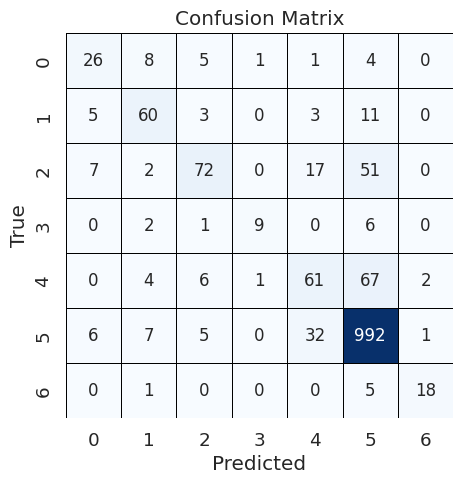

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

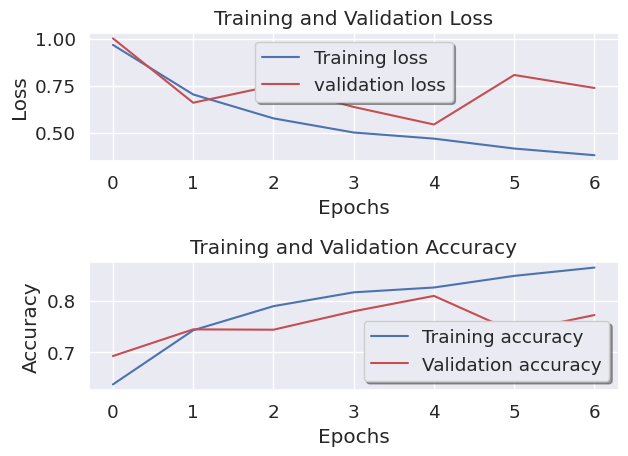

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
resnet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/12_best_model_RESNET152V2.h5')
results = resnet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = resnet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 14s 93ms/step - loss: 0.5187 - accuracy: 0.8242
 validation loss and accuracy are [0.5187352299690247, 0.8242343664169312]
0.5187352299690247 Test accuracy: 0.8242


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.379415,0.864194,0.736912,0.77179,0.518735,0.824234


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.467830,0.838944,0.755351,0.749168,0.872452,0.748336
1,0.731449,0.733952,0.740776,0.745842,0.760208,0.736352
2,0.886042,0.672896,0.913179,0.666001,0.736101,0.745672
3,0.598114,0.776827,0.778477,0.711910,0.707489,0.747004
4,0.353761,0.870471,0.608069,0.785762,0.524188,0.814913
5,1.046808,0.617546,1.309630,0.552229,0.937717,0.641811
6,1.270661,0.529110,0.950318,0.697272,0.928070,0.704394
7,0.447120,0.843509,0.761075,0.758483,0.786843,0.752996
8,0.691937,0.743937,0.777028,0.738523,0.783333,0.727696
9,1.087620,0.594437,0.804057,0.706587,0.850097,0.717710


**#Iteration 13:**

In [ ]:
##############################################################################################################

In [ ]:
resnet_model = Sequential()
pretrained_model=ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(GlobalAveragePooling2D())
resnet_model.add(Dense(224, activation='relu'))
resnet_model.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = SGD(lr=0.00001, momentum=0.9, nesterov=True)

resnet_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/13_best_model_RESNET152V2.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=resnet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 91s 119ms/step - loss: 1.3468 - accuracy: 0.4927 - val_loss: 1.0575 - val_accuracy: 0.6534
Epoch 2/30
701/701 [==============================] - 82s 117ms/step - loss: 1.1827 - accuracy: 0.5605 - val_loss: 0.9973 - val_accuracy: 0.6933
Epoch 3/30
701/701 [==============================] - 79s 113ms/step - loss: 1.1165 - accuracy: 0.5830 - val_loss: 1.0546 - val_accuracy: 0.6454
Epoch 4/30
701/701 [==============================] - 79s 113ms/step - loss: 1.0614 - accuracy: 0.6143 - val_loss: 1.3322 - val_accuracy: 0.5536
Epoch 4: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = resnet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 16s 89ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  2  11  14   7   1   9   1]
 [  1  33  10   6   0  31   1]
 [  3  14  30   3   4  94   1]
 [  0   1   4   5   0   8   0]
 [  2  11  13   4   9 100   2]
 [  2  17  25   5   9 977   8]
 [  1   0   0   0   0  10  13]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.18      0.04      0.07        45
         bcc       0.38      0.40      0.39        82
         bkl       0.31      0.20      0.24       149
          df       0.17      0.28      0.21        18
         mel       0.39      0.06      0.11       141
          nv       0.79      0.94      0.86      1043
        vasc       0.50      0.54      0.52        24

    accuracy                           0.71      1502
   macro avg       0.39      0.35      0.34      1502
weighted avg       0.66      0.71      0.67      1502



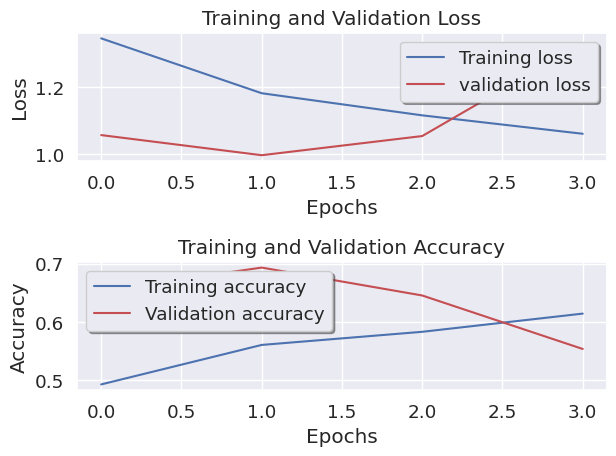

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
resnet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/13_best_model_RESNET152V2.h5')
results = resnet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = resnet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 14s 92ms/step - loss: 0.8965 - accuracy: 0.7117
 validation loss and accuracy are [0.8964908123016357, 0.7117177248001099]
0.8964908123016357 Test accuracy: 0.7117


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,1.061434,0.614265,1.332206,0.55356,0.896491,0.711718


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.467830,0.838944,0.755351,0.749168,0.872452,0.748336
1,0.731449,0.733952,0.740776,0.745842,0.760208,0.736352
2,0.886042,0.672896,0.913179,0.666001,0.736101,0.745672
3,0.598114,0.776827,0.778477,0.711910,0.707489,0.747004
4,0.353761,0.870471,0.608069,0.785762,0.524188,0.814913
5,1.046808,0.617546,1.309630,0.552229,0.937717,0.641811
6,1.270661,0.529110,0.950318,0.697272,0.928070,0.704394
7,0.447120,0.843509,0.761075,0.758483,0.786843,0.752996
8,0.691937,0.743937,0.777028,0.738523,0.783333,0.727696
9,1.087620,0.594437,0.804057,0.706587,0.850097,0.717710


**#Iteration 14:**

In [ ]:
##############################################################################################################

In [ ]:
resnet_model = Sequential()
pretrained_model=ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(GlobalAveragePooling2D())
resnet_model.add(Dense(512, activation='relu', input_dim=(224,224,3)))
resnet_model.add(Dropout(0.3))
resnet_model.add(Dense(224, activation='relu'))
resnet_model.add(Dropout(0.3))
resnet_model.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = SGD(lr=0.00001, momentum=0.9, nesterov=True)

resnet_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/14_best_model_RESNET152V2.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=resnet_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 91s 119ms/step - loss: 1.4947 - accuracy: 0.4375 - val_loss: 0.9706 - val_accuracy: 0.6687
Epoch 2/30
701/701 [==============================] - 83s 118ms/step - loss: 1.3551 - accuracy: 0.4963 - val_loss: 0.8943 - val_accuracy: 0.6866
Epoch 3/30
701/701 [==============================] - 79s 113ms/step - loss: 1.2935 - accuracy: 0.5071 - val_loss: 1.0724 - val_accuracy: 0.6500
Epoch 4/30
701/701 [==============================] - 83s 118ms/step - loss: 1.2737 - accuracy: 0.5312 - val_loss: 0.9646 - val_accuracy: 0.6919
Epoch 4: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = resnet_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 18s 89ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  4  14   1   4   4  17   1]
 [  3  32   0   3   4  35   5]
 [  8  25   4   2  29  79   2]
 [  1   5   0   4   1   6   1]
 [  2  10   2   4  43  75   5]
 [  3  19   1   5  54 943  18]
 [  0   0   0   0   1   9  14]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.19      0.09      0.12        45
         bcc       0.30      0.39      0.34        82
         bkl       0.50      0.03      0.05       149
          df       0.18      0.22      0.20        18
         mel       0.32      0.30      0.31       141
          nv       0.81      0.90      0.85      1043
        vasc       0.30      0.58      0.40        24

    accuracy                           0.70      1502
   macro avg       0.37      0.36      0.33      1502
weighted avg       0.67      0.70      0.66      1502



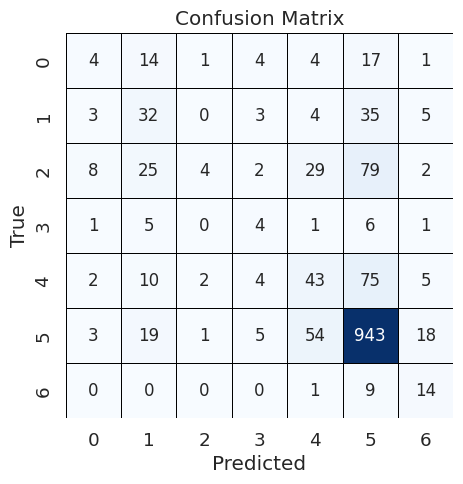

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

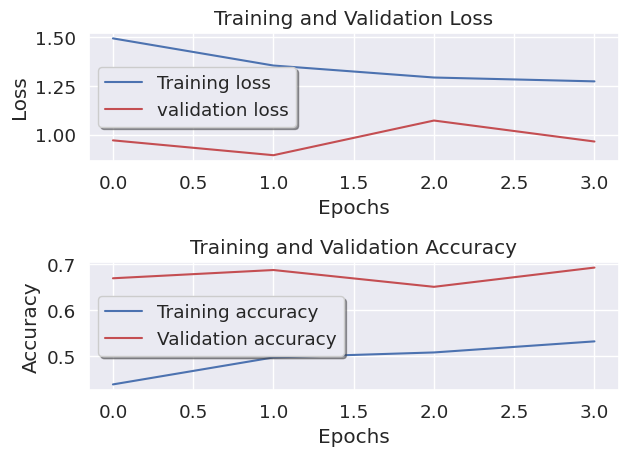

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
resnet_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/14_best_model_RESNET152V2.h5')
results = resnet_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = resnet_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 14s 93ms/step - loss: 0.9581 - accuracy: 0.6818
 validation loss and accuracy are [0.9580592513084412, 0.6817576289176941]
0.9580592513084412 Test accuracy: 0.6818


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,1.273743,0.531241,0.964603,0.691949,0.958059,0.681758


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.467830,0.838944,0.755351,0.749168,0.872452,0.748336
1,0.731449,0.733952,0.740776,0.745842,0.760208,0.736352
2,0.886042,0.672896,0.913179,0.666001,0.736101,0.745672
3,0.598114,0.776827,0.778477,0.711910,0.707489,0.747004
4,0.353761,0.870471,0.608069,0.785762,0.524188,0.814913
5,1.046808,0.617546,1.309630,0.552229,0.937717,0.641811
6,1.270661,0.529110,0.950318,0.697272,0.928070,0.704394
7,0.447120,0.843509,0.761075,0.758483,0.786843,0.752996
8,0.691937,0.743937,0.777028,0.738523,0.783333,0.727696
9,1.087620,0.594437,0.804057,0.706587,0.850097,0.717710


In [ ]:
import datetime
import pytz

london_timezone = pytz.timezone('Europe/London')
current_time_london = datetime.datetime.now(london_timezone)
print("Current Date and Time in London:", current_time_london.strftime("%Y-%m-%d %H:%M:%S %Z"))